## DATA ANALISIS

In [1]:
import pandas as pd
import numpy as np
!pip install geopy
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
!conda install -c anaconda seaborn --yes
# import library
import seaborn as sns

     |████████████████████████████████| 112kB 5.2MB/s eta 0:00:01
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36he6145b8_1001         347 KB  conda-forge
    certifi-2020.6.20          |   py36h9880bd3_2         151 KB  conda-forge
    chardet-3.0.4              |py36h9880bd3_1008         194 KB  conda-forge
    cryptography-3.1.1         |   py36h5d711a5_1         623 KB  conda-forge
    entrypoints-0.3            |py36h9f0ad1d_1002          13 KB  conda-forge
    fo

In [2]:
print("Instalacion completa")

Instalacion completa


## LOADING DATA

In [4]:
coordinates= pd.read_csv(r'coordenadas.csv')

In [20]:
coordinates.dtypes

Distrito           int64
Macrodistrito     object
Latitude         float64
Longitude        float64
dtype: object

In [21]:
coordinates.head()

,Distrito,Macrodistrito,Latitude,Longitude
0,1,Centro,-16.496946,-68.133407
1,2,Centro,-16.499426,-68.122380
2,3,Cotahuma,-16.514952,-68.129473
3,4,Cotahuma,-16.537604,-68.135559
4,5,Cotahuma,-16.494808,-68.151444


In [7]:
growing= pd.read_csv(r'crecimiento.csv')

In [22]:
growing.dtypes

Actividad_Economica     object
Crecimiento            float64
Participacion          float64
dtype: object

In [8]:
growing.head()

,Actividad_Economica,Crecimiento,Participacion
0,Agricultura-Silvicultura-Caza-Pezca,4.09,7.24
1,Extraccion de Minas y Canteras,5.36,6.15
2,Industrias Manufactureras,3.87,8.76
3,Electricidad Gas y Agua,3.50,2.29
4,Construccion,-2.76,1.68


In [9]:
population= pd.read_csv(r'poblacion_la_paz.csv')

In [23]:
population.dtypes

Distrito              int64
Habitantes            int64
Superficie_km2      float64
Densidad_hab_km2    float64
Hombres             float64
Mujeres             float64
edad_0_14           float64
edad_15_64          float64
edad_65_mas         float64
Hogares               int64
dtype: object

In [10]:
population.head()

,Distrito,Habitantes,Superficie_km2,Densidad_hab_km2,Hombres,Mujeres,edad_0_14,edad_15_64,edad_65_mas,Hogares
0,3,35944,2.362766,15212.67870,46.981416,53.018584,19.878144,69.398654,10.723202,11963
1,4,53461,12.471605,4286.61748,48.270702,51.729298,27.345168,67.251361,5.403472,15605
2,5,50716,1.579951,32099.72968,48.091332,51.908668,27.299077,67.283962,5.416961,14945
3,6,38916,1.288748,30196.74909,50.552472,49.447528,18.223867,72.212890,9.563243,12306
4,7,61887,1.577995,39218.75545,47.415451,52.584549,25.213696,68.522326,6.263978,18783


In [11]:
business=pd.read_csv(r'unidades_economicas.csv')

In [24]:
business.dtypes

DEPARTAMENTO           object
2019                    int64
2020                    int64
VARIACION_ABSOLUTA      int64
VARIACION_RELATIVA    float64
dtype: object

In [12]:
business.head()

,DEPARTAMENTO,2019,2020,VARIACION_ABSOLUTA,VARIACION_RELATIVA
0,Chuquisaca,13344,13636,292,2.19
1,La Paz,100445,103395,2950,2.94
2,Cochabamba,55973,56863,890,1.59
3,Oruro,15735,16007,272,1.73
4,Potosi,14194,14578,384,2.71


## ANALYSISNG DATA

Let's see the differences between cities in relation to the number of economic units 

<AxesSubplot:xlabel='DEPARTAMENTO', ylabel='2019'>

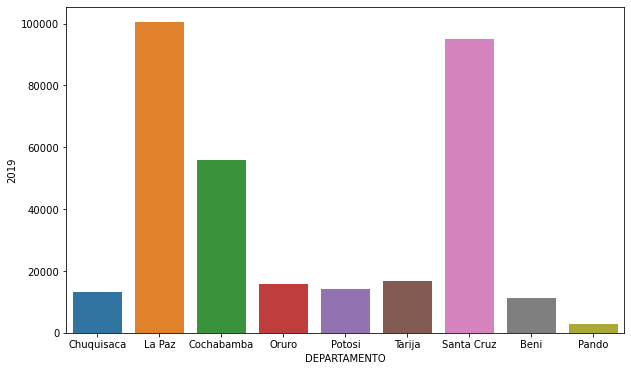

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x="DEPARTAMENTO", y="2019", data=business)

According to this plot, the cities of Santa Cruz and La Paz have the most businesses.

Now let's look at the comparison of productive sectors within the city of La Paz

<AxesSubplot:xlabel='Actividad_Economica', ylabel='Participacion'>

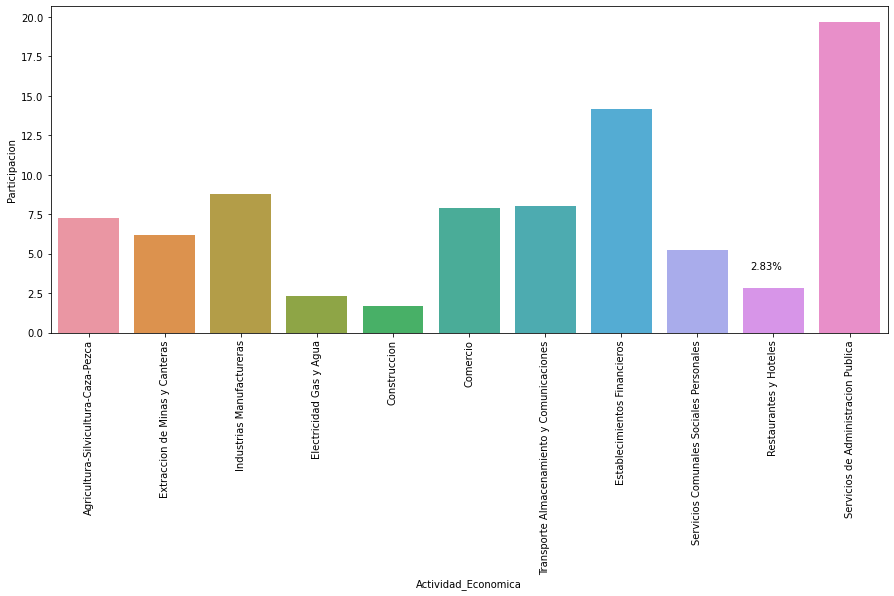

In [49]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.text(8.7,4, str(growing.loc[9,"Participacion"])+"%")
sns.barplot(x="Actividad_Economica", y="Participacion", data=growing)

According to the data, the restaurant area has an approximate participation of 2.83% of the market

Now, Let's see the growth of the sector

<AxesSubplot:xlabel='Actividad_Economica', ylabel='Crecimiento'>

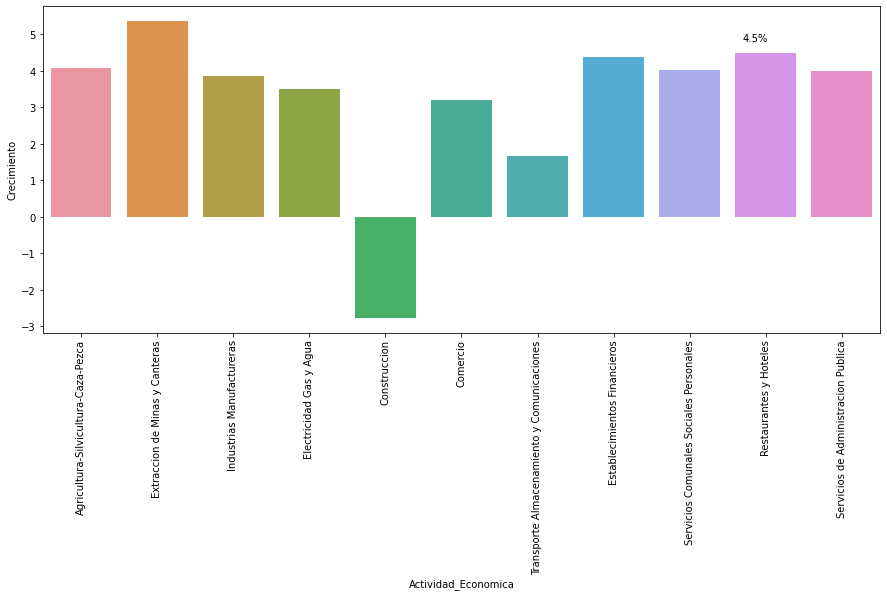

In [54]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.text(8.7,4.8, str(growing.loc[9,"Crecimiento"])+"%")
sns.barplot(x="Actividad_Economica", y="Crecimiento", data=growing)

We see that although the market share is small, in growth it is in second place

Now let's focus on the city and its characteristics according to the inhabitants and their districts

<AxesSubplot:xlabel='Distrito', ylabel='Habitantes'>

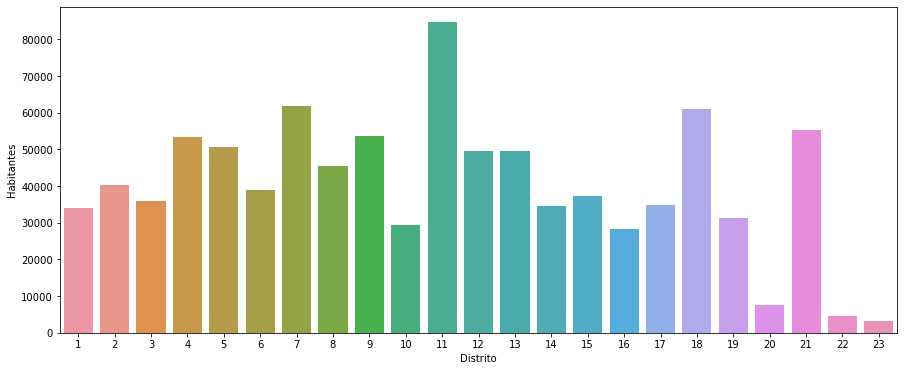

In [59]:
plt.figure(figsize=(15,6))
sns.barplot(x="Distrito", y="Habitantes", data=population)

In [68]:
df2=population[["Distrito","Habitantes"]]
df2.head()

,Distrito,Habitantes
0,3,35944
1,4,53461
2,5,50716
3,6,38916
4,7,61887


In [70]:
union= pd.merge(coordinates, df2, on="Distrito")
union.head()

,Distrito,Macrodistrito,Latitude,Longitude,Habitantes
0,1,Centro,-16.496946,-68.133407,33889
1,2,Centro,-16.499426,-68.122380,40396
2,3,Cotahuma,-16.514952,-68.129473,35944
3,4,Cotahuma,-16.537604,-68.135559,53461
4,5,Cotahuma,-16.494808,-68.151444,50716


In [108]:
LaPaz_data["Distrito"]= LaPaz_data["Distrito"].astype(str)

In [110]:
LaPaz_data.dtypes

Distrito          object
Macrodistrito     object
Latitude         float64
Longitude        float64
Habitantes         int64
dtype: object

In [131]:
LaPaz_data["Nombre"]="Macrodistrito " + LaPaz_data["Macrodistrito"]+", Distrito "+LaPaz_data["Distrito"]
LaPaz_data.head()

,Distrito,Macrodistrito,Latitude,Longitude,Habitantes,Nombre
0,1,Centro,-16.496946,-68.133407,33889,"Macrodistrito Centro, Distrito 1"
1,2,Centro,-16.499426,-68.122380,40396,"Macrodistrito Centro, Distrito 2"
2,3,Cotahuma,-16.514952,-68.129473,35944,"Macrodistrito Cotahuma, Distrito 3"
3,4,Cotahuma,-16.537604,-68.135559,53461,"Macrodistrito Cotahuma, Distrito 4"
4,5,Cotahuma,-16.494808,-68.151444,50716,"Macrodistrito Cotahuma, Distrito 5"


In [129]:
#LaPaz_data.drop(['Nombre'], axis='columns', inplace=True)
#LaPaz_data.head()

## PLOTTING DATA ON THE MAP USING FOLIUM

In [115]:
address = 'La Paz, Bolivia'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of La Paz are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of La Paz are -16.4955455, -68.1336229.


In [132]:
# create map of La Paz using latitude and longitude values
map_LaPaz = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(LaPaz_data['Latitude'], LaPaz_data['Longitude'],LaPaz_data['Nombre']+", Habitantes: "+LaPaz_data["Habitantes"].astype(str)):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_LaPaz)  
    
map_LaPaz

## FINDING PLACES

In [133]:
CLIENT_ID = '1AQJMCFU0PJAS5JYZRTRG0KWGWXPEP5CUL1GRUKYS2JXDU41' # your Foursquare ID
CLIENT_SECRET = '2ZAKMBIETWNQXTYZCKRZFI0ZF4L01EDTZUTSEV5PZF34WFNU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1AQJMCFU0PJAS5JYZRTRG0KWGWXPEP5CUL1GRUKYS2JXDU41
CLIENT_SECRET:2ZAKMBIETWNQXTYZCKRZFI0ZF4L01EDTZUTSEV5PZF34WFNU


In [134]:
LaPaz_data.loc[0, 'Nombre']

'Macrodistrito Centro, Distrito 1'

In [136]:
neighborhood_latitude = LaPaz_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = LaPaz_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = LaPaz_data.loc[0, 'Nombre'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Macrodistrito Centro, Distrito 1 are -16.496945999999998, -68.13340699999999.


In [150]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/search?categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)


In [151]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [152]:
results = requests.get(url).json()

In [153]:
results

{'meta': {'code': 200, 'requestId': '5f8ceff10572497850ec1f2a'},
 'response': {'venues': [{'id': '5b6b5057a9e402002caff46b',
    'name': 'Geisha Coffe House',
    'location': {'lat': -16.495633,
     'lng': -68.133172,
     'labeledLatLngs': [{'label': 'display',
       'lat': -16.495633,
       'lng': -68.133172}],
     'distance': 148,
     'cc': 'BO',
     'city': 'La Paz',
     'state': 'La Paz',
     'country': 'Bolivia',
     'formattedAddress': ['La Paz', 'Bolivia']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1603071985',
    'hasPerk': False},
   {'id': '50f02696e4b0cd11854e7257',
    'name': 'Tomate Café',
    'location': {'address': 'Ayacucho',
     'crossStreet': 'Potosí',
     'lat': -16.49705930045442,
     'ln

In [154]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [156]:
venues = results['response']['venues']
    
nearby_venues = json_normalize(venues) # flatten JSON
nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.address,location.crossStreet,location.postalCode
0,5b6b5057a9e402002caff46b,Geisha Coffe House,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1603071985,False,-16.495633,-68.133172,"[{'label': 'display', 'lat': -16.495633, 'lng'...",148,BO,La Paz,La Paz,Bolivia,"[La Paz, Bolivia]",NaN,NaN,NaN
1,50f02696e4b0cd11854e7257,Tomate Café,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",v-1603071985,False,-16.497059,-68.133939,"[{'label': 'display', 'lat': -16.4970593004544...",58,BO,La Paz,La Paz,Bolivia,"[Ayacucho (Potosí), La Paz, Bolivia]",Ayacucho,Potosí,NaN
2,4c0afe567e3fc9283aadf482,Burger King,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1603071985,False,-16.497095,-68.135071,"[{'label': 'display', 'lat': -16.4970948085762...",178,BO,La Paz,La Paz,Bolivia,"[Socabaya 1500 (Entre Potosi y Mercado), La Pa...",Socabaya 1500,Entre Potosi y Mercado,NaN
3,58f6ae95237dee43d91f1505,Texas,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1603071985,False,-16.497868,-68.133354,"[{'label': 'display', 'lat': -16.497868, 'lng'...",102,BO,Provincia Murillo,La Paz,Bolivia,"[Colon (Mercado), La Paz 2174, Bolivia]",Colon,Mercado,2174
4,506dced8e4b0f91938062541,Los lomitos del 6,"[{'id': '4bf58dd8d48988d107941735', 'name': 'A...",v-1603071985,False,-16.496910,-68.134772,"[{'label': 'display', 'lat': -16.4969103609642...",145,BO,La Paz,La Paz,Bolivia,"[La Paz, Bolivia]",NaN,NaN,NaN


In [157]:
venues = results['response']['venues']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Geisha Coffe House,Coffee Shop,-16.495633,-68.133172
1,Tomate Café,Vegetarian / Vegan Restaurant,-16.497059,-68.133939
2,Burger King,Fast Food Restaurant,-16.497095,-68.135071
3,Texas,Fast Food Restaurant,-16.497868,-68.133354
4,Los lomitos del 6,Argentinian Restaurant,-16.496910,-68.134772


In [158]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

47 venues were returned by Foursquare.


In [159]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Nombre', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [160]:
# type your answer here
LaPaz_venues = getNearbyVenues(names=LaPaz_data['Nombre'],
                                   latitudes=LaPaz_data['Latitude'],
                                   longitudes=LaPaz_data['Longitude']
                                  )

Macrodistrito Centro, Distrito 1
Macrodistrito Centro, Distrito 2
Macrodistrito Cotahuma, Distrito 3
Macrodistrito Cotahuma, Distrito 4
Macrodistrito Cotahuma, Distrito 5
Macrodistrito Cotahuma, Distrito 6
Macrodistrito Max Paredes, Distrito 7
Macrodistrito Max Paredes, Distrito 8
Macrodistrito Max Paredes, Distrito 9
Macrodistrito Max Paredes, Distrito 10
Macrodistrito Periférica, Distrito 11
Macrodistrito Periférica, Distrito 12
Macrodistrito Periférica, Distrito 13
Macrodistrito San Antonio, Distrito 14
Macrodistrito San Antonio, Distrito 15
Macrodistrito San Antonio, Distrito 16
Macrodistrito San Antonio, Distrito 17
Macrodistrito Sur, Distrito 18
Macrodistrito Sur, Distrito 19
Macrodistrito Mallasa, Distrito 20
Macrodistrito Sur, Distrito 21
Macrodistrito Hampaturi, Distrito 22
Macrodistrito Zongo, Distrito 23


In [161]:
print(LaPaz_venues.shape)
LaPaz_venues.head()

(305, 7)


,Nombre,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Macrodistrito Centro, Distrito 1",-16.496946,-68.133407,Geisha Coffe House,-16.495633,-68.133172,Coffee Shop
1,"Macrodistrito Centro, Distrito 1",-16.496946,-68.133407,Tomate Café,-16.497059,-68.133939,Vegetarian / Vegan Restaurant
2,"Macrodistrito Centro, Distrito 1",-16.496946,-68.133407,Burger King,-16.497095,-68.135071,Fast Food Restaurant
3,"Macrodistrito Centro, Distrito 1",-16.496946,-68.133407,Texas,-16.497868,-68.133354,Fast Food Restaurant
4,"Macrodistrito Centro, Distrito 1",-16.496946,-68.133407,Los lomitos del 6,-16.496910,-68.134772,Argentinian Restaurant


In [162]:
LaPaz_venues.groupby('Nombre').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Nombre,,,,,,
"Macrodistrito Centro, Distrito 1",47,47,47,47,47,47
"Macrodistrito Centro, Distrito 2",49,49,49,49,49,49
"Macrodistrito Cotahuma, Distrito 3",46,46,46,46,46,46
"Macrodistrito Cotahuma, Distrito 5",11,11,11,11,11,11
"Macrodistrito Cotahuma, Distrito 6",47,47,47,47,47,47
"Macrodistrito Max Paredes, Distrito 8",8,8,8,8,8,8
"Macrodistrito Max Paredes, Distrito 9",1,1,1,1,1,1
"Macrodistrito San Antonio, Distrito 14",1,1,1,1,1,1
"Macrodistrito San Antonio, Distrito 15",6,6,6,6,6,6


In [163]:
print('There are {} uniques categories.'.format(len(LaPaz_venues['Venue Category'].unique())))

There are 52 uniques categories.


In [164]:
# one hot encoding
LaPaz_onehot = pd.get_dummies(LaPaz_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
LaPaz_onehot['Nombre'] = LaPaz_venues['Nombre'] 

# move neighborhood column to the first column
fixed_columns = [LaPaz_onehot.columns[-1]] + list(LaPaz_onehot.columns[:-1])
LaPaz_onehot = LaPaz_onehot[fixed_columns]

LaPaz_onehot.head()

,Nombre,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bakery,Brazilian Restaurant,Breakfast Spot,Burger Joint,Cafeteria,Café,...,Snack Place,Soup Place,South American Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tea Room,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,"Macrodistrito Centro, Distrito 1",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Macrodistrito Centro, Distrito 1",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,"Macrodistrito Centro, Distrito 1",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Macrodistrito Centro, Distrito 1",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Macrodistrito Centro, Distrito 1",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
LaPaz_onehot.shape

(305, 53)

In [166]:
LaPaz_grouped = LaPaz_onehot.groupby('Nombre').mean().reset_index()
LaPaz_grouped

,Nombre,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bakery,Brazilian Restaurant,Breakfast Spot,Burger Joint,Cafeteria,Café,...,Snack Place,Soup Place,South American Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Tea Room,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,"Macrodistrito Centro, Distrito 1",0.021277,0.000000,0.000000,0.042553,0.000000,0.042553,0.000000,0.000000,0.042553,...,0.000000,0.000000,0.063830,0.021277,0.000000,0.000000,0.021277,0.021277,0.000000,0.000000
1,"Macrodistrito Centro, Distrito 2",0.000000,0.000000,0.102041,0.040816,0.040816,0.020408,0.040816,0.020408,0.020408,...,0.020408,0.000000,0.061224,0.000000,0.000000,0.020408,0.000000,0.020408,0.000000,0.020408
2,"Macrodistrito Cotahuma, Distrito 3",0.000000,0.000000,0.065217,0.043478,0.000000,0.043478,0.021739,0.000000,0.065217,...,0.000000,0.021739,0.021739,0.043478,0.021739,0.000000,0.000000,0.065217,0.021739,0.021739
3,"Macrodistrito Cotahuma, Distrito 5",0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,...,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"Macrodistrito Cotahuma, Distrito 6",0.000000,0.021277,0.106383,0.021277,0.000000,0.042553,0.000000,0.000000,0.063830,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277
5,"Macrodistrito Max Paredes, Distrito 8",0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.125000,0.000000,0.000000,...,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,"Macrodistrito Max Paredes, Distrito 9",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,"Macrodistrito San Antonio, Distrito 14",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,"Macrodistrito San Antonio, Distrito 15",0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,"Macrodistrito San Antonio, Distrito 16",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [167]:
LaPaz_grouped.shape

(12, 53)

## TOP 10 RESTAURANTS

In [172]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [173]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Nombre']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Nombre'] = LaPaz_grouped['Nombre']

for ind in np.arange(LaPaz_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(LaPaz_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Nombre,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Macrodistrito Centro, Distrito 1",Restaurant,Fast Food Restaurant,Latin American Restaurant,Coffee Shop,Chinese Restaurant,South American Restaurant,Fried Chicken Joint,Bakery,Breakfast Spot,Café
1,"Macrodistrito Centro, Distrito 2",Restaurant,BBQ Joint,Fast Food Restaurant,South American Restaurant,Chinese Restaurant,Diner,Bakery,Brazilian Restaurant,Fried Chicken Joint,Burger Joint
2,"Macrodistrito Cotahuma, Distrito 3",Restaurant,Fast Food Restaurant,BBQ Joint,Café,Vegetarian / Vegan Restaurant,Steakhouse,Bakery,Breakfast Spot,Italian Restaurant,Pizza Place
3,"Macrodistrito Cotahuma, Distrito 5",Latin American Restaurant,Seafood Restaurant,Ice Cream Shop,Burger Joint,Fish & Chips Shop,Restaurant,Soup Place,Fried Chicken Joint,Breakfast Spot,Cafeteria
4,"Macrodistrito Cotahuma, Distrito 6",Restaurant,BBQ Joint,Fried Chicken Joint,Latin American Restaurant,Café,Seafood Restaurant,Pastry Shop,Italian Restaurant,Breakfast Spot,Food Truck


## Clustering Neighborhoods

In [174]:
# set number of clusters
kclusters = 5

LaPaz_grouped_clustering = LaPaz_grouped.drop('Nombre', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(LaPaz_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 0, 2, 0, 3, 1, 4, 1], dtype=int32)

In [175]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

LaPaz_merged = LaPaz_data

# merge LaPaz_grouped with LaPaz_data to add latitude/longitude for each neighborhood
LaPaz_merged = LaPaz_merged.join(neighborhoods_venues_sorted.set_index('Nombre'), on='Nombre')

LaPaz_merged.head() # check the last columns!

,Distrito,Macrodistrito,Latitude,Longitude,Habitantes,Nombre,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Centro,-16.496946,-68.133407,33889,"Macrodistrito Centro, Distrito 1",2.0,Restaurant,Fast Food Restaurant,Latin American Restaurant,Coffee Shop,Chinese Restaurant,South American Restaurant,Fried Chicken Joint,Bakery,Breakfast Spot,Café
1,2,Centro,-16.499426,-68.122380,40396,"Macrodistrito Centro, Distrito 2",2.0,Restaurant,BBQ Joint,Fast Food Restaurant,South American Restaurant,Chinese Restaurant,Diner,Bakery,Brazilian Restaurant,Fried Chicken Joint,Burger Joint
2,3,Cotahuma,-16.514952,-68.129473,35944,"Macrodistrito Cotahuma, Distrito 3",2.0,Restaurant,Fast Food Restaurant,BBQ Joint,Café,Vegetarian / Vegan Restaurant,Steakhouse,Bakery,Breakfast Spot,Italian Restaurant,Pizza Place
3,4,Cotahuma,-16.537604,-68.135559,53461,"Macrodistrito Cotahuma, Distrito 4",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Cotahuma,-16.494808,-68.151444,50716,"Macrodistrito Cotahuma, Distrito 5",0.0,Latin American Restaurant,Seafood Restaurant,Ice Cream Shop,Burger Joint,Fish & Chips Shop,Restaurant,Soup Place,Fried Chicken Joint,Breakfast Spot,Cafeteria


## Plotting Clustered Neghborhoods

In [179]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [180]:
rainbow

['#8000ff', '#00b5eb', '#80ffb4', '#ffb360', '#ff0000']

In [187]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [204]:
#LaPaz_merged['Cluster Labels'].replace(np.nan,0)
#LaPaz_merged['Cluster Labels'] = LaPaz_merged['Cluster Labels'].astype(int)
#LaPaz_data["Distrito"]= LaPaz_data["Distrito"].astype(str)
#LaPaz_merged['Cluster Labels'].dtypes
#LaPaz_merged['Cluster Labels'] = LaPaz_merged['Cluster Labels'].astype(int)

In [214]:
LaPaz_merged['Cluster Labels'].replace(np.nan,0, inplace=True)

In [215]:
LaPaz_merged['Cluster Labels'].unique()

array([2., 0., 3., 1., 4.])

In [218]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(LaPaz_merged['Latitude'], LaPaz_merged['Longitude'], LaPaz_merged['Nombre'], LaPaz_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [219]:
LaPaz_merged.loc[LaPaz_merged['Cluster Labels'] == 0, LaPaz_merged.columns[[1] + list(range(5, LaPaz_merged.shape[1]))]]

,Macrodistrito,Nombre,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Cotahuma,"Macrodistrito Cotahuma, Distrito 4",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cotahuma,"Macrodistrito Cotahuma, Distrito 5",0.0,Latin American Restaurant,Seafood Restaurant,Ice Cream Shop,Burger Joint,Fish & Chips Shop,Restaurant,Soup Place,Fried Chicken Joint,Breakfast Spot,Cafeteria
6,Max Paredes,"Macrodistrito Max Paredes, Distrito 7",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Max Paredes,"Macrodistrito Max Paredes, Distrito 8",0.0,Seafood Restaurant,Ice Cream Shop,Breakfast Spot,Burger Joint,Soup Place,Latin American Restaurant,Fish & Chips Shop,Deli / Bodega,French Restaurant,Food Truck
9,Max Paredes,"Macrodistrito Max Paredes, Distrito 10",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Periférica,"Macrodistrito Periférica, Distrito 11",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Periférica,"Macrodistrito Periférica, Distrito 12",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Periférica,"Macrodistrito Periférica, Distrito 13",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,San Antonio,"Macrodistrito San Antonio, Distrito 17",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Sur,"Macrodistrito Sur, Distrito 19",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
LaPaz_merged.loc[LaPaz_merged['Cluster Labels'] == 1, LaPaz_merged.columns[[1] + list(range(5, LaPaz_merged.shape[1]))]]

,Macrodistrito,Nombre,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,San Antonio,"Macrodistrito San Antonio, Distrito 14",1.0,Fried Chicken Joint,Wings Joint,Vietnamese Restaurant,Gluten-free Restaurant,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop,Fast Food Restaurant
15,San Antonio,"Macrodistrito San Antonio, Distrito 16",1.0,Fried Chicken Joint,Wings Joint,Vietnamese Restaurant,Gluten-free Restaurant,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop,Fast Food Restaurant


In [221]:
LaPaz_merged.loc[LaPaz_merged['Cluster Labels'] == 2, LaPaz_merged.columns[[1] + list(range(5, LaPaz_merged.shape[1]))]]

,Macrodistrito,Nombre,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Centro,"Macrodistrito Centro, Distrito 1",2.0,Restaurant,Fast Food Restaurant,Latin American Restaurant,Coffee Shop,Chinese Restaurant,South American Restaurant,Fried Chicken Joint,Bakery,Breakfast Spot,Café
1,Centro,"Macrodistrito Centro, Distrito 2",2.0,Restaurant,BBQ Joint,Fast Food Restaurant,South American Restaurant,Chinese Restaurant,Diner,Bakery,Brazilian Restaurant,Fried Chicken Joint,Burger Joint
2,Cotahuma,"Macrodistrito Cotahuma, Distrito 3",2.0,Restaurant,Fast Food Restaurant,BBQ Joint,Café,Vegetarian / Vegan Restaurant,Steakhouse,Bakery,Breakfast Spot,Italian Restaurant,Pizza Place
5,Cotahuma,"Macrodistrito Cotahuma, Distrito 6",2.0,Restaurant,BBQ Joint,Fried Chicken Joint,Latin American Restaurant,Café,Seafood Restaurant,Pastry Shop,Italian Restaurant,Breakfast Spot,Food Truck
17,Sur,"Macrodistrito Sur, Distrito 18",2.0,Fast Food Restaurant,Bakery,Restaurant,BBQ Joint,Seafood Restaurant,Pizza Place,Vegetarian / Vegan Restaurant,Burger Joint,Steakhouse,Latin American Restaurant
20,Sur,"Macrodistrito Sur, Distrito 21",2.0,Burger Joint,Restaurant,Fast Food Restaurant,Fried Chicken Joint,Pizza Place,BBQ Joint,Bakery,Sandwich Place,Chinese Restaurant,Cupcake Shop


In [222]:
LaPaz_merged.loc[LaPaz_merged['Cluster Labels'] == 3, LaPaz_merged.columns[[1] + list(range(5, LaPaz_merged.shape[1]))]]

,Macrodistrito,Nombre,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Max Paredes,"Macrodistrito Max Paredes, Distrito 9",3.0,Latin American Restaurant,Wings Joint,Hot Dog Joint,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop,Fast Food Restaurant


In [223]:
LaPaz_merged.loc[LaPaz_merged['Cluster Labels'] == 4, LaPaz_merged.columns[[1] + list(range(5, LaPaz_merged.shape[1]))]]

,Macrodistrito,Nombre,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,San Antonio,"Macrodistrito San Antonio, Distrito 15",4.0,Restaurant,BBQ Joint,Fast Food Restaurant,Snack Place,Seafood Restaurant,Comfort Food Restaurant,French Restaurant,Food Truck,Food Stand,Food Court
